# Oracle CPU analysis

Datafile: oracle_cpu_free_percent_2020.11.14.csv

Read the datafile


In [3]:
import pandas as pd
from datetime import datetime

df = pd.read_csv('./oracle_cpu_free_percent_2020.11.14.csv',
                 index_col='timestamp_per_hour',
                 parse_dates=['timestamp_per_hour'],
                 date_parser = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
                )

df['idle_cpu_pct'] = df.avg_cpu_idle_pct*100/24
df['used_cpu_pct'] = 100 - df.idle_cpu_pct


In [4]:
df.sort_index(inplace=True)
#df.sort_index(ascending=False)
df.head()

,host_name,avg_cpu_idle_pct,idle_cpu_pct,used_cpu_pct
timestamp_per_hour,,,,
2020-09-29 00:00:00,instance_1,13.918,57.991667,42.008333
2020-09-29 00:00:00,instance_2,7.450,31.041667,68.958333
2020-09-29 01:00:00,instance_2,7.303,30.429167,69.570833
2020-09-29 01:00:00,instance_1,13.091,54.545833,45.454167
2020-09-29 02:00:00,instance_2,7.529,31.370833,68.629167


In [5]:
df.drop(columns=['avg_cpu_idle_pct','idle_cpu_pct'],inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7a65684c0>],
      dtype=object)

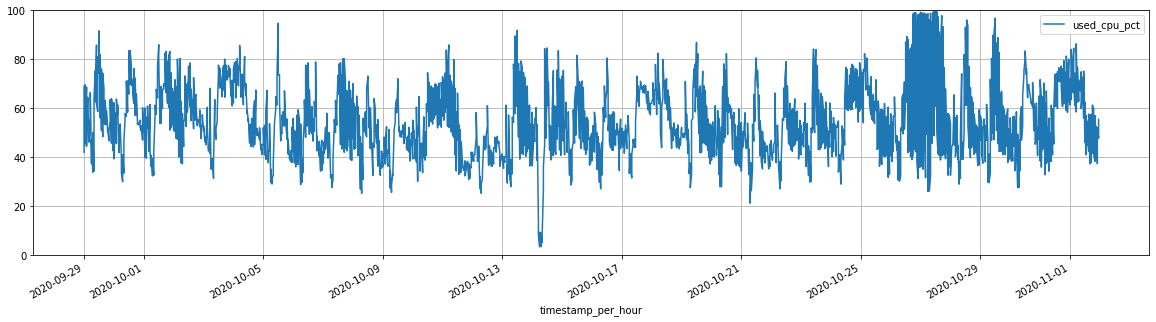

In [6]:
df.plot(kind='line', grid=True, ylim=(0,100), subplots=True, figsize=(20,5))

In [10]:
df.head()

,host_name,used_cpu_pct
timestamp_per_hour,,
2020-09-29 00:00:00,instance_1,42.008333
2020-09-29 00:00:00,instance_2,68.958333
2020-09-29 01:00:00,instance_2,69.570833
2020-09-29 01:00:00,instance_1,45.454167
2020-09-29 02:00:00,instance_2,68.629167


In [12]:
racprod1 = df.query('host_name == "instance_1"')
racprod1

,host_name,used_cpu_pct
timestamp_per_hour,,
2020-09-29 00:00:00,instance_1,42.008333
2020-09-29 01:00:00,instance_1,45.454167
2020-09-29 02:00:00,instance_1,44.395833
2020-09-29 03:00:00,instance_1,64.462500
2020-09-29 04:00:00,instance_1,46.133333
...,...,...
2020-11-01 19:00:00,instance_1,59.841667
2020-11-01 20:00:00,instance_1,57.012500
2020-11-01 21:00:00,instance_1,52.733333


Split the original dataframe in two, one for each server of the Oracle cluster

In [13]:
racprod1=df.where(df['host_name'] == 'instance_1')
racprod1.dropna(inplace=True)
racprod1.head()

,host_name,used_cpu_pct
timestamp_per_hour,,
2020-09-29 00:00:00,instance_1,42.008333
2020-09-29 01:00:00,instance_1,45.454167
2020-09-29 02:00:00,instance_1,44.395833
2020-09-29 03:00:00,instance_1,64.462500
2020-09-29 04:00:00,instance_1,46.133333


In [14]:
racprod1.describe()

,used_cpu_pct
count,817.000000
mean,50.703274
std,13.765199
min,3.366667
25%,41.033333
50%,48.354167
75%,60.804167
max,86.300000


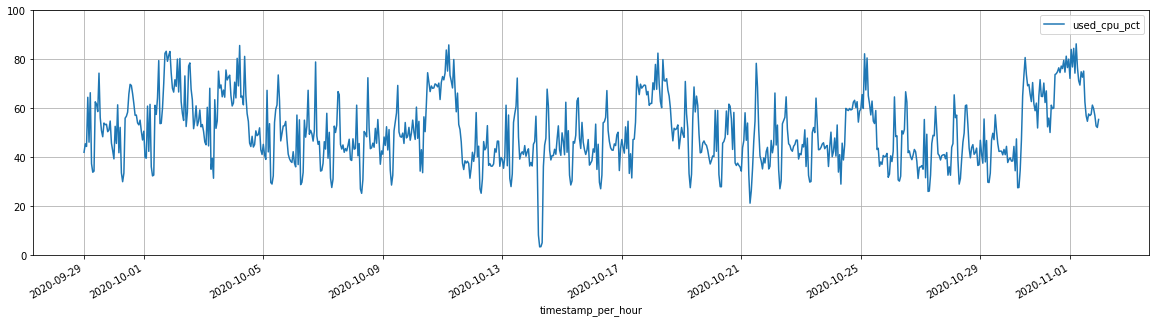

In [15]:
racprod1.plot(kind='line', grid=True, ylim=(0,100), figsize=(20,5))

In [16]:
racprod2=df.where(df['host_name'] == 'instance_2')
racprod2.dropna(inplace=True)
racprod2.head()

,host_name,used_cpu_pct
timestamp_per_hour,,
2020-09-29 00:00:00,instance_2,68.958333
2020-09-29 01:00:00,instance_2,69.570833
2020-09-29 02:00:00,instance_2,68.629167
2020-09-29 03:00:00,instance_2,60.025000
2020-09-29 04:00:00,instance_2,50.712500


In [17]:
racprod2.describe()

,used_cpu_pct
count,817.000000
mean,57.975903
std,15.443064
min,8.120833
25%,46.954167
50%,56.362500
75%,67.662500
max,99.575000


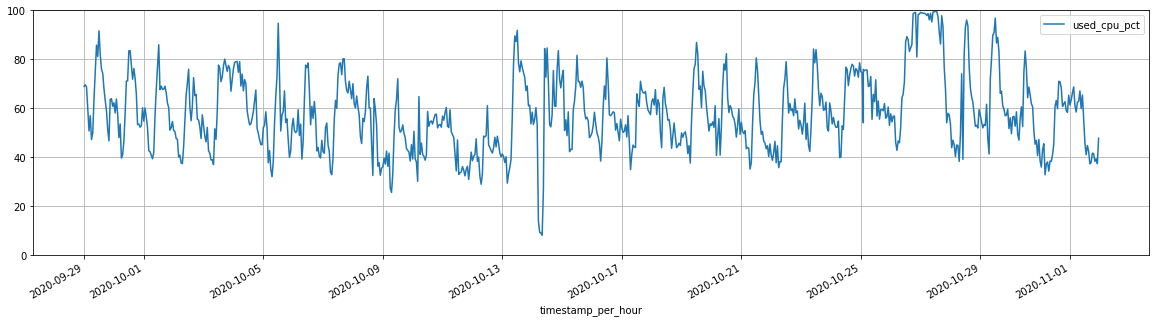

In [18]:
racprod2.plot(kind='line', grid=True, ylim=(0,100), figsize=(20,5))